# 9. Nenadgledano mašinsko učenje - Klasterizacija 

(Gorjan Nadzinski, FEEIT, CMUS, Severna Makedonija)

U ovom poglavlju saznaćete o nenadgledanom mašinskom učenju, kao metodi učenja iz podataka koji su "nelabelirani", tj. imaju poznate karakteristike, ali bez poznatih vrednosti ili klasa (vidi sliku 1). Opšta ideja je da algoritam bude u stanju da klasifikuje podatke tako što će izvući zaključke iz nekih skrivenih osnovnih obrazaca.
<figure>
<img src="https://github.com/VALENCEML/eBOOK/blob/main/EN/09/unsup1.png?raw=1" style="height: 300px;"/>
<figcaption align = "center"> Slika 1. Razlika između nadgledanog i nenadgledanog učenja </figcaption>
</figure>

Klasterizacija je oblik nenadgledanog učenja u kojem je algoritmu postavljen zadatak grupisanja skupa objekata u grupe nazvane klasteri tako da su objekti u istom klasteru sličniji jedni drugima nego onima u drugim klasterima.

Postoji nekoliko različitih algoritama za klasterizacija, kao što su:

- KMeans;
- DBSCAN;
- Aglomerativno hijerarhijsko klasterizacija;
- Klasterizacija metodom očekivanja–maksimizacije (EM);
- Klasterizacija pomakom srednjih vrednosti.

Često je na korisniku da odredi broj klastera, tj. to je najvažniji hiperparametar u klasterovanju. Različiti algoritmi zatim koriste različite metode za grupisanje podataka u klastere (npr. udaljenost između tačaka podataka, gustina tačaka podataka itd.).

## 9.1. Klasterizacija metodom K-srednjih vrednosti(k-means clustering)

### 9.1.1. Algoritam

Ovo je jedna od najpopularnijih i najčešće korišćenih metoda za klasterizacija. Deli podatke na K različitih klastera na osnovu euklidskog (geometrijskog) rastojanja između tačaka podataka.

To je jednostavan algoritam koji funkcioniše na sledeći način:

1. Generišite slučajne centarne tačke (nazivamo ih **centroidi**) za K klastera.
2. Prođite kroz sve tačke podataka i proverite koji je centroid najbliži; dodelite tačku podataka tom klasteru.
3. Izračunajte novu lokaciju za svaki od K centroida tako što ćete izračunati srednju vrednost lokacija svih tačaka podataka dodeljenih tom klasteru.
4. Izračunajte vrednost **funkcije troška** za dato klasterizacija.
5. Ako je razlika između vrednosti funkcije troška u trenutnoj i prethodnoj iteraciji veća od neke tolerancije $\epsilon$, vratite se na korak 2. U suprotnom, vratite poslednje klasterizacija.
ILI
Ako maksimalni broj iteracija nije dostignut, vratite se na korak 2. U suprotnom, vratite poslednje klasterizacija.

Poslednji korak se razlikuje u zavisnosti od toga da li je uslov za zaustavljanje algoritma dostizanje nekog maksimalnog broja iteracija, ili ako je uslov da vrednost funkcije troška konvergira (tj. prestaje da se značajno menja između iteracija). Prag $\epsilon$ ispod kojeg se promena smatra neznatnom takođe je hiperparametar koji definiše korisnik.

Algoritam je vizuelno predstavljen na slici 2., gde je prikazana redistribucija tačaka podataka u 3 klastera tokom 14 iteracija.

<figure>
<img src="https://github.com/VALENCEML/eBOOK/blob/main/EN/09/K-means_convergence.gif?raw=1" style="height: 300px;"/>
<figcaption align = "center"> slika 2 Koraci KMeans algoritma (Chire, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons) </figcaption>
</figure>

### 9.1.2. Funkcija troškova

Funkcija troškova u klasterizaciji metodom K-srednjih vrednosti se naziva i **izobličenje** i predstavlja zbir udaljenosti između svake tačke i njenog lokalnog centroida.

Ako je m broj tačaka podataka, x<sup>(i)</sup> su tačke podataka, $\mu$<sub>(i)</sub> je centroid klastera kojem je tačka podataka x<sup>(i)</sup> dodeljena, a $||A-B||^2$ je udaljenost između dve tačke A i B, tada se izobličenje J računa kao:

$J=\frac{1}{m}\sum_{i=1}^m ||x^{(i)}-\mu_{(i)}||^2$

Prolazeći kroz korake 2 i 3, algoritam zapravo pokušava da optimizuje ovu funkciju J, tj. pokušava da pronađe najbolju moguću raspodelu tačaka podataka u klastere koja će rezultirati najmanjom mogućom vrednošću za J.

Ova funkcija troškova nije konveksna, što znači da ako pokrenete KMeans algoritam na istim podacima dva puta, možda nećete dobiti isti rezultat. Konačni rezultat zavisi od početnih pozicija centroida, koje se biraju nasumično. Zato je vrlo važno probati algoritam više puta kako bi mu se pružila prilika da pravilno konvergira i izabere najbolji rezultat.

Druga opcija je korišćenje posebnog načina odabira početnih pozicija centroida nazvanog k-means++. Ovde neće biti objašnjeno, ali se koristi prilikom pozivanja KMeans funkcije u sklearn.

### 9.1.3. Jednostavni primeri

Hajde da definišemo nekoliko primera skupova podataka i testiramo KMeans algoritam na njima.

In [1]:
# Import the necessary libraries and modules:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

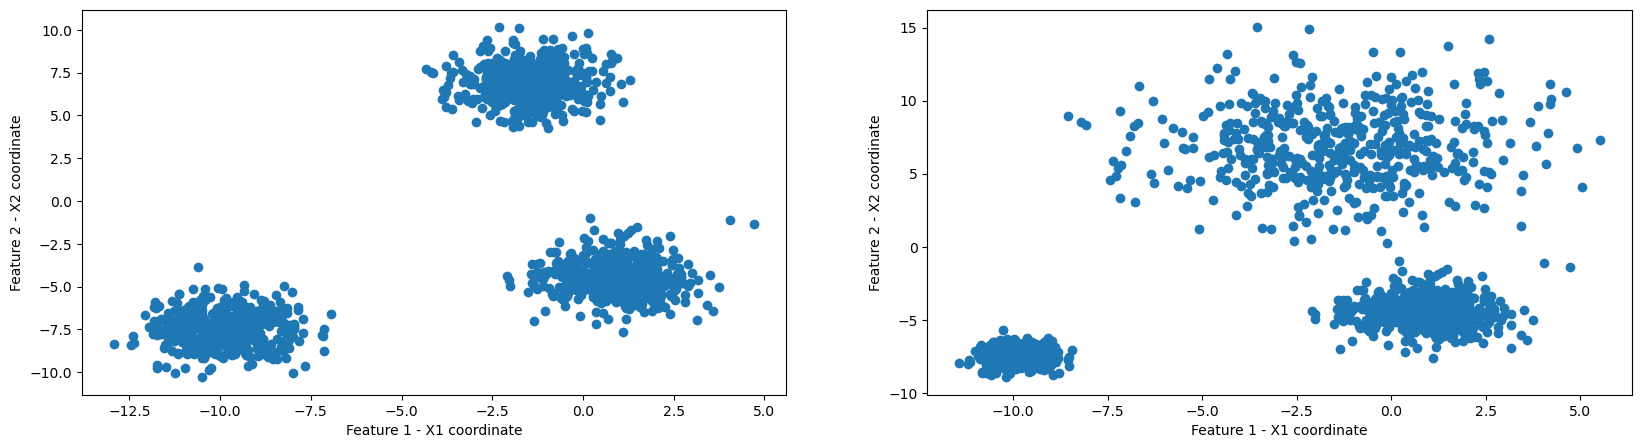

In [2]:
n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate blobs with similar variances (shapes):
blobs = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
# Generate blobs with different variances (shapes):
varied = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],random_state=random_state)

# Plot the generated datasets:
datsets = {'blobs': blobs,'varied': varied}
plot_nr = 1
plt.figure(figsize=(20, 5))
for key in datsets:
    X, y = datsets[key]
    plt.subplot(1, len(datsets), plot_nr)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

Čini se očiglednim da u oba slučaja treba da postoji 3 klastera, pa ćemo koristiti taj broj.

Prvo ćemo razdvojiti parne grupe u klastere. Radimo sledeće stvari:

* Pribavljamo dvodimenzionalne koordinate svake tačke podataka (X) i klaster kojem pripadaju (y). VAŽNO: Algoritam ne zna klastere tačaka podataka, zbog čega se uči nenadgledano.
* Standardizujemo osobine pomoću funkcije StandardScaler, što znači da svi podaci sada imaju nultu srednju vrednost i jediničnu varijansu. Ovo je važan korak u klasterizaciji kako bi se izbegli problemi koji mogu nastati zbog oblika i raspodele podataka.
* Pozivamo/inicijalizujemo KMeans algoritam. Dodeljujemo sledeće argumente:
  * n__klastera je broj klastera.
  * init je način na koji inicijalizujemo centroide. Možemo to učiniti nasumično, kao što je dato u ovom primeru, ili možemo koristiti k-means++ koji bira početne centroide klastera uzorkovanjem na osnovu empirijske verovatnoće raspodele tačaka u doprinosu ukupnoj inerciji.
  * n__init je broj puta koliko će algoritam pokušati nasumično da ponovo generiše početne centroide pre nego što izabere najbolji slučaj.
  * max__iter je broj iteracija pre nego što algoritam stane.
* Pokrećemo algoritam sa kmeans.fit_predict i fit_transform (primetite kako algoritmu dajemo samo X vrednosti).
* Crtamo rezultate, gde je svaki klaster u drugoj boji.

c:\Users\arpik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


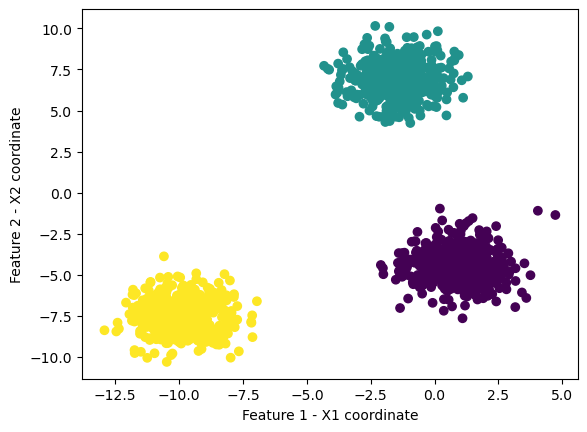

In [3]:
X, y = datsets['blobs'] # retrieve data
scaler = StandardScaler() # standardize data
kmeans = KMeans(n_clusters=3,init='random',n_init=5,max_iter=20) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
#plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');

Primetite kako su podaci razdvojeni u 3 klastera prilično logično prema našim standardima. Ali pitanje koje ćemo kasnije postaviti je kako odrediti broj klastera generalno, kada problem ne možemo vizualizovati.

Sada, hajde da vidimo šta se dešava kada pokušamo da razdvojimo podatke različitih oblika u 3 klastera. Koristimo iste argumente kao ranije, izuzetak je što ovog puta stavljamo broj nasumičnih inicijalizacija na 1. To znači da će algoritam pokušati da razdvoji podatke nakon samo 1 pokušaja nasumične inicijalizacije centroida. Pokrenite sledeći kod nekoliko puta i primetite kako klasterizacija nije dosledna jer zavisi od početnih uslova.

c:\Users\arpik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


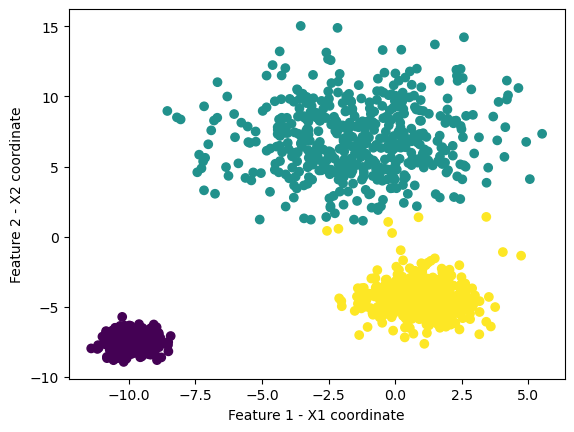

In [4]:
X, y = datsets['varied'] # retrieve data
scaler = StandardScaler() # standardize data
kmeans = KMeans(n_clusters=3,init='random',n_init=1,max_iter=20) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
# plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');

Ovo se lako može rešiti na nekoliko različitih načina:
* broj inicijalizacija može biti veći (kao u prethodnom primeru),
* broj iteracija može biti veći (iako to ne garantuje uvek konvergenciju),
* može se koristiti drugačija tehnika inicijalizacije: k-means++ umesto nasumične.

Pokušajte ponovo primer, ali ovog puta promenite vrednosti ova tri argumenta i posmatrajte rezultate.

c:\Users\arpik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


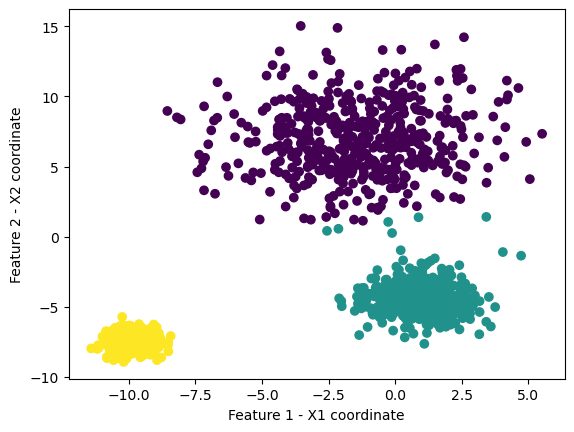

In [5]:
X, y = datsets['varied'] # retrieve data
scaler = StandardScaler() # standardize data

# Try both methods by inserting 0 for 'random' or 1 for 'k-means++' 
# in the 'init' list when calling KMeans: 
init=['random','k-means++'] 
# Try different numbers of initializations:
n_init=1 
# Try different (larger) numbers of maximum iterations:
max_iter=200 

kmeans = KMeans(n_clusters=3,init=init[0],n_init=n_init,max_iter=max_iter) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
# plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');

Primetite da za jednu nasumičnu inicijalizaciju, ponekad klasteri možda neće pravilno konvergirati bez obzira na broj iteracija.

### 9.1.4. Određivanje broja klastera

Ako problem nije jednostavno razumljiv ili vizualno prikaziv, broj klastera ne možemo uvek lako odrediti. Dobar metod za određivanje najboljeg broja klastera je korišćenje takozvanog "**metoda lakta**".

Ideja iza njega je izračunavanje vrednosti izobličenja na kraju klasterisanja za različite brojeve klastera. Zapamtite da je ova vrednost reprezentacija "lošeg" ili greške u klasterisanju i trebalo bi da bude što niža.

Ako postoji nagli pad izobličenja na određenom broju, nakon čega se smanjenje usporava i postaje linearno, tada se taj broj klastera bira. Razlog je taj što broj klastera proizvodi preveliko izobličenje za manje klastere, a više klastera nije vredno jer izobličenje se više ne smanjuje mnogo.

Prikažimo ovo na prethodnim primerima.

c:\Users\arpik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\arpik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\arpik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\arpik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

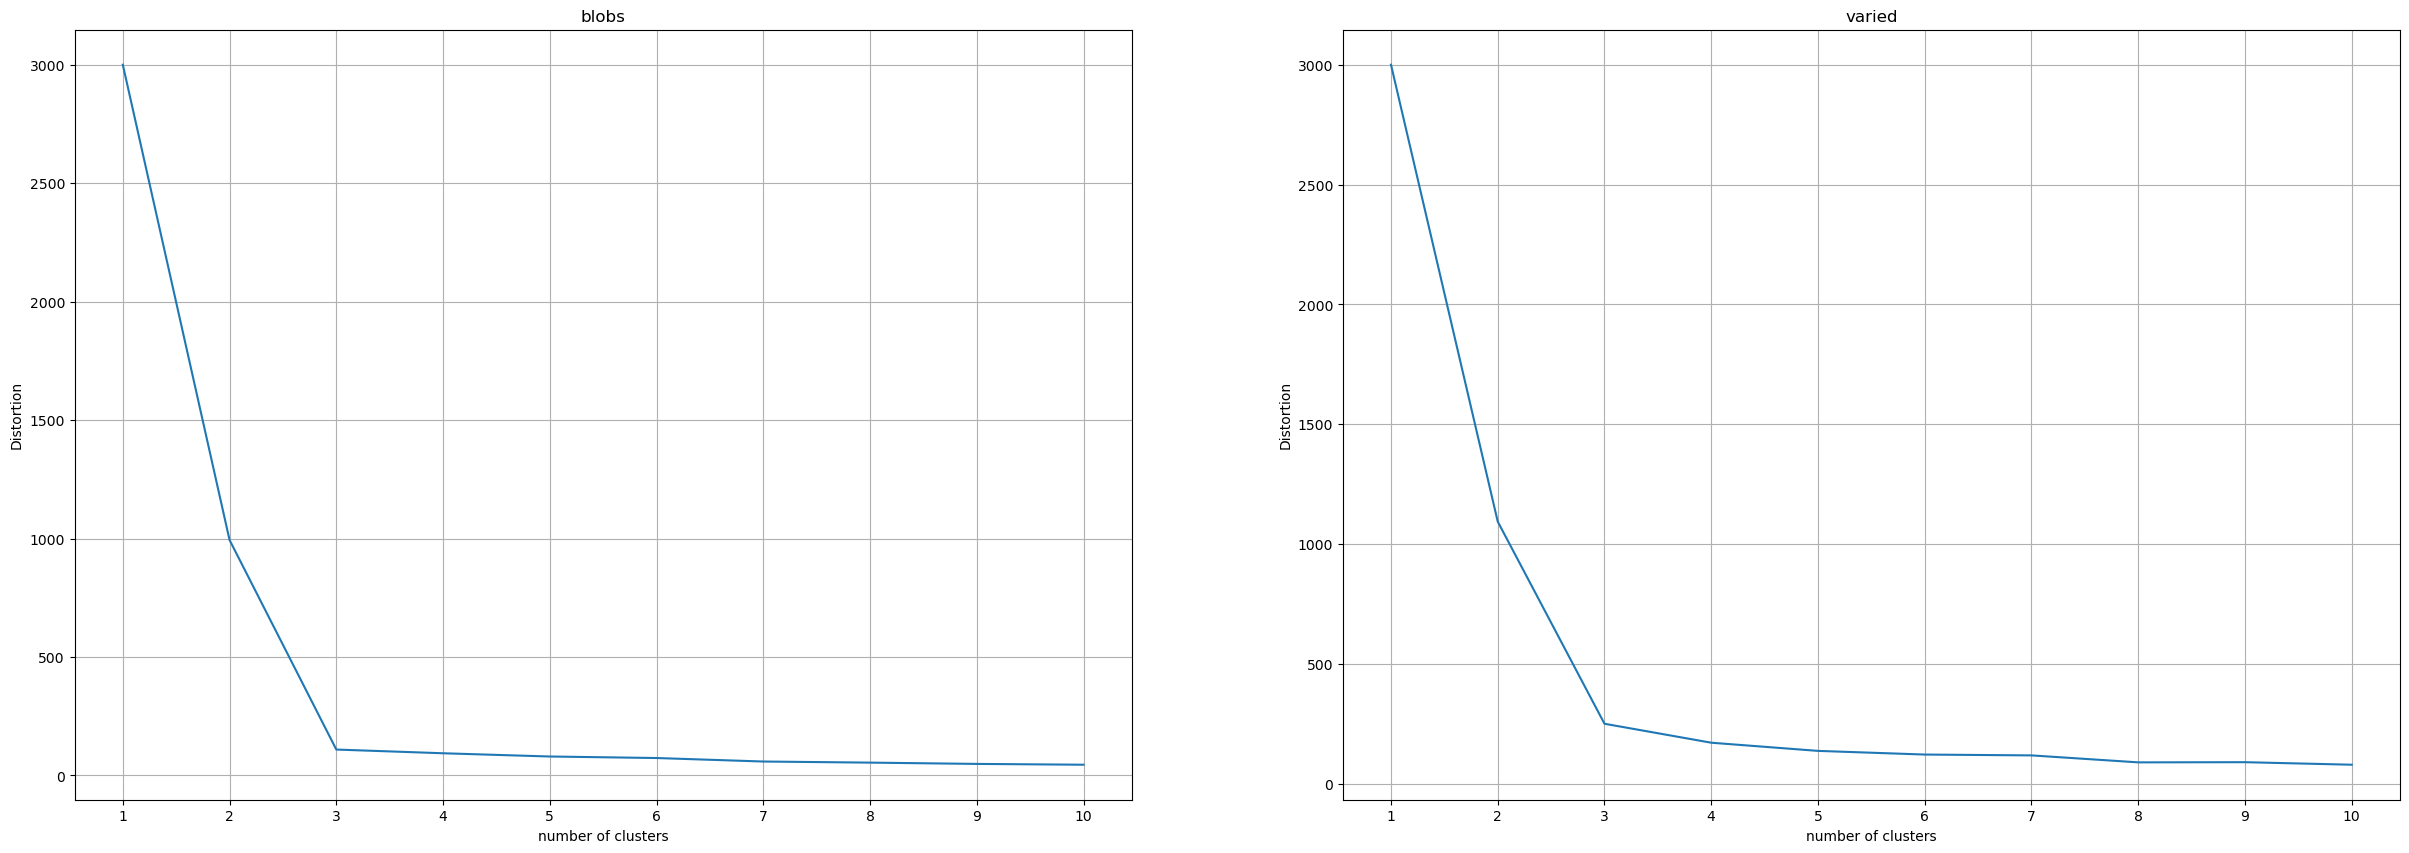

In [6]:
plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots
max_nr_clusters = 10 # maximum number of clusters

for key in datsets: # for each dataset:
    X, y = datsets[key] # retrieve data
    cost_func = [] # define an empty list to store the values of the distortion
    for nr_clusters in range(1, max_nr_clusters + 1): # for an increasing number of clusters, starting from one:
        scaler = StandardScaler() # standardize data
        kmeans = KMeans(n_clusters=nr_clusters,init='random',n_init=5) # initialize algorithm
        kmeans.fit(scaler.fit_transform(X)) # run algorithm
        cost_func.append(kmeans.inertia_) # calculate inertia (interchangable with distortion)
    # Plot the dependence of the distortion from the number of clusters:
    plt.subplot(1, len(datsets), plot_nr) 
    plt.plot(range(1, 11), cost_func)
    plt.xlabel('number of clusters')
    plt.ylabel('Distortion')
    plt.title(key)
    plt.xticks(range(1, 11))
    plt.grid()
    plot_nr += 1 

Očigledno je da lakat (prelomna tačka) u oba slučaja nastaje za 3 klastera. Stoga je naš izbor na početku, inspirisan izgledom podataka, bio tačan.

Naravno, ovaj metod služi samo za davanje preporuke o broju klastera. Bilo koji dodatni podaci o problemu mogu pomoći u određivanju broja klastera više nego metoda lakta.

### 9.1.5. Ograničenja KMeans

KMeans je zgodan jer je lako implementirati i može se koristiti sa velikim skupovima podataka. Međutim, jedan od njegovih glavnih nedostataka (pored činjenice da je osetljiv na početne pozicije centroida klastera) je što loše radi kada podaci imaju nepravilne (ne sfere) oblike.

Takav primer može se videti iz sledećih skupova podataka, oblikovanih kao koncentrični krugovi i kao polumeseci.

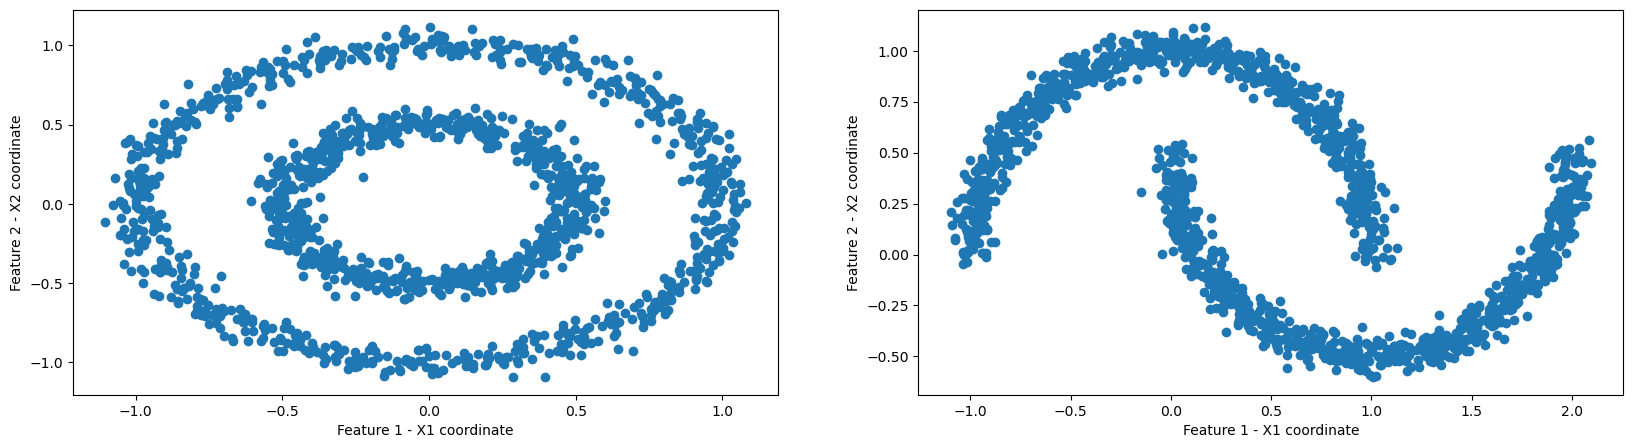

In [7]:
n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate concentrical circles:
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=.5,noise=.05)
# Generate crescents:
noisy_moons = datasets.make_moons(n_samples=n_samples,noise=.05) 

# Plot the generated datasets:
datsets2 = {'circles': noisy_circles,'crescents': noisy_moons}
plot_nr = 1
plt.figure(figsize=(20, 5))
for key in datsets2:
    X, y = datsets2[key]
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

Hajde da pokušamo da podelimo podatke u 2 klastera, očekujući da svaki od njih sadrži 2 kruga u prvom primeru i svaki od 2 polumeseca u drugom primeru.

c:\Users\arpik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\arpik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


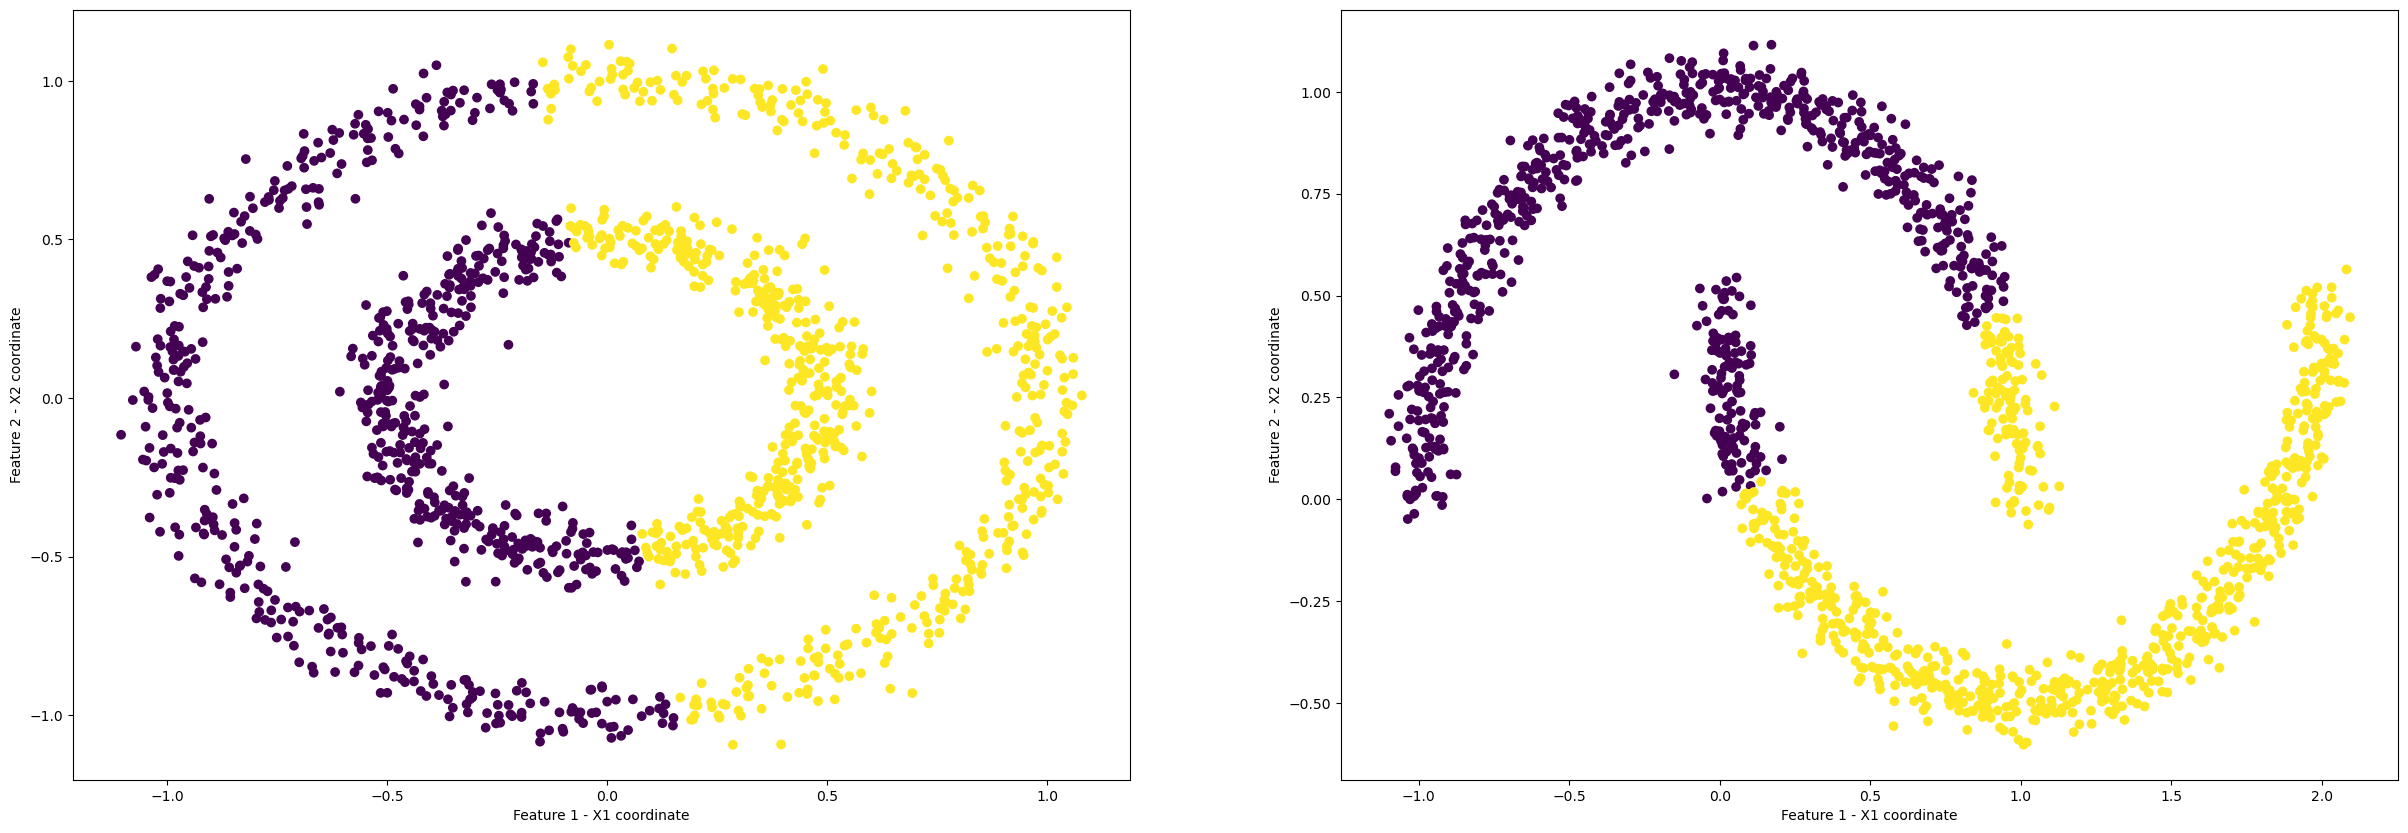

In [8]:
plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots

for key in datsets2: # for each dataset:
    X, y = datsets2[key] # retrieve data
    scaler = StandardScaler() # standardize data
    kmeans = KMeans(n_clusters=2,init='random',n_init=5,max_iter=200) # initialize algorithm
    y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
    # plot:
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

U takvim slučajevima preporučuju se drugi pristupi. Na primer, **DBSCAN (prostorno grupisanje aplikacija zasnovano na gustini sa šumom)** koristi gustinu tačaka podataka umesto njihovih rastojanja, pa bi u ovom primeru bolje radio.

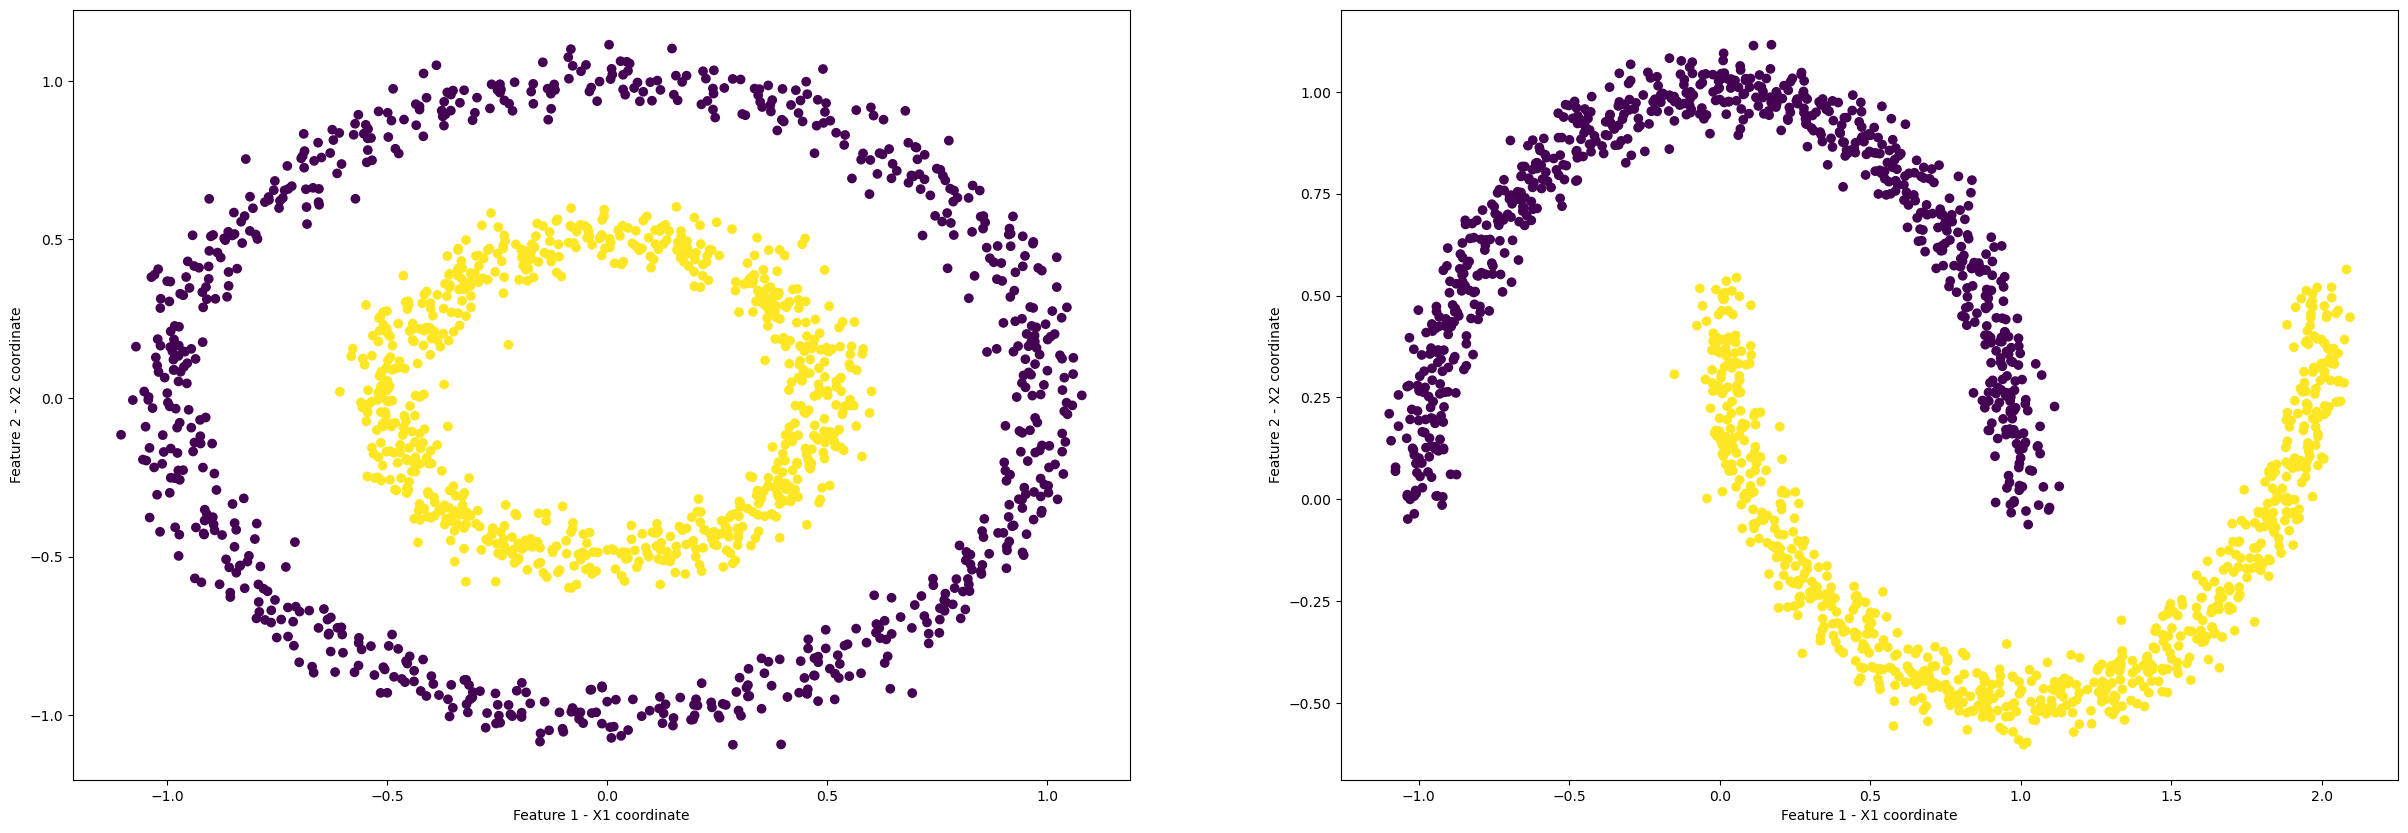

In [9]:
from sklearn.cluster import DBSCAN 

plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots

for key in datsets2: # for each dataset:
    X, y = datsets2[key] # retrieve data
    scaler = StandardScaler() # standardize data
    dbscan = DBSCAN(eps=0.3,min_samples=10) # initialize algorithm
    y_pred = dbscan.fit_predict(scaler.fit_transform(X)) # run algorithm
    # plot:
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

DBSCAN je uspešno prepoznao dva oblika, jer je zainteresovan za gustinu kao reprezentaciju grupisanja podataka, umesto njihovog rastojanja (što je očigledno ako uporedite sa rezultatima KMeans na istim skupovima podataka). S druge strane, DBSCAN neće dobro raditi ako oblici imaju različitu gustinu.

Dva hiperparametra koje smo definisali za DBSCAN su:
* `eps` je maksimalno rastojanje između dva uzorka da bi jedan bio smatran kao u okolini drugog.
* `_min__samples_` je broj uzoraka u okolini za tačku da bi se smatrala kao osnovna tačka.

Ovi hiperparametri su mnogo teži za podešavanje od onih kod KMeans jer su apstraktniji, pa iako je moćniji od KMeans, ovo je delikatniji i teži algoritam za pravilno podešavanje.

## 9.2. Primer korišćenja KMeans za klasterisanje meteoroloških stanica prema klimatskim karakteristikama

U ovom primeru koristićemo skup podataka sa meteoroloških (vremenskih) stanica u Kanadi, čije su karakteristike merenja na svakoj stanici. Klasterisanje ćemo vršiti prema tipovima klime, a zatim ćemo geografski prikazati stanice kako bismo procenili naš pristup.

Biće vam potrebne sledeće biblioteke:

1. wget -> (conda install -c conda-forge python-wget) za preuzimanje datoteka
2. cartopy -> (conda install -c conda-forge cartopy) za crtanje mape
3. PIL -> (conda install -c anaconda pillow)

Informacije o skupu podataka:
<h4 align = "center">
Environment Canada    
Mesečne vrednosti za jul - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
border: 1px solid #dddddd;
text-align: left;
padding: 8px;
}

tr:nth-child(even) {
background-color: #dddddd;
}
</style>
</head>
<body>
<table>
  <tr>
    <th>Naziv u tabeli</th>
    <th>Značenje</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Naziv stanice</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Geografska širina (Sever+, stepeni)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Geografska dužina (Zapad -, stepeni)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Pokrajina</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Srednja temperatura (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Dani bez važeće srednje temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Razlika srednje temperature od normalne (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Najviša mesečna maksimalna temperatura (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Dani bez važeće maksimalne temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Najniža mesečna minimalna temperatura (°C)</font></td>
      </tr>
  <tr>
    <td>DwTn</td>
    <td>Dani bez važeće minimalne temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snežni pokrivač (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Dani bez važećeg snežnog pokrivača</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Procenat normalnog (1981-2010) snežnog pokrivača</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Ukupne padavine (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Dani bez važećih padavina</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Procenat normalnih (1981-2010) padavina</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snežni pokrivač na kraju meseca (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Broj dana sa padavinama 1,0 mm ili više</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Sjajno sunce (sati)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Dani bez važećeg sjajnog sunca</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Procenat normalnog (1981-2010) sjajnog sunca</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Dani sa temperaturom ispod 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Dani sa temperaturom iznad 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Identifikator klimatske stanice (prve 3 cifre označavaju sliv, poslednja 4 znaka su za abecedno sortiranje).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Nije dostupno</td>
  </tr>
</table>
</body>
</html>

Uvoz neophodnih biblioteka, preuzimanje datoteke sa podacima:

In [10]:
import wget
import cartopy.crs as ccrs
import cartopy

ModuleNotFoundError: No module named 'wget'

Ako biblioteke **wget** i **cartopy** ne mogu biti uvezene, prvo otkomentarišite i pokrenite sledeću ćeliju, a zatim pokušajte ponovo da ih uvezete.

In [ ]:
#!pip install wget
#!pip install cartopy

Zatim uvezite ostale biblioteke:

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv')

100% [............................................................................] 129821 / 129821

'weather-stations20140101-20141231 (3).csv'

In [ ]:
data = pd.read_csv('weather-stations20140101-20141231.csv')

In [ ]:
data.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


Uklanjanje praznih podataka (NaN):

In [ ]:
data.drop(columns=['BS', 'DwBS', 'BS%', 'D', 'S', 'DwS', 'S%N', 'P%N', 'S_G'], inplace=True)
data.dropna(axis='rows', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1340
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1143 non-null   object 
 1   Lat       1143 non-null   float64
 2   Long      1143 non-null   float64
 3   Prov      1143 non-null   object 
 4   Tm        1143 non-null   float64
 5   DwTm      1143 non-null   float64
 6   Tx        1143 non-null   float64
 7   DwTx      1143 non-null   float64
 8   Tn        1143 non-null   float64
 9   DwTn      1143 non-null   float64
 10  P         1143 non-null   float64
 11  DwP       1143 non-null   float64
 12  Pd        1143 non-null   float64
 13  HDD       1143 non-null   float64
 14  CDD       1143 non-null   float64
 15  Stn_No    1143 non-null   object 
dtypes: float64(13), object(3)
memory usage: 151.8+ KB


In [ ]:
data.describe()

,Lat,Long,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.0
mean,50.950539,-97.471895,-11.535696,2.270341,3.082677,1.846019,-25.880490,1.834646,50.091426,2.524934,7.446194,757.104549,0.0
std,5.757043,23.136281,10.328233,4.964097,8.684320,4.208333,12.654909,4.314045,62.909236,4.666180,4.762158,309.067992,0.0
min,42.043000,-140.868000,-36.400000,0.000000,-28.900000,0.000000,-49.700000,0.000000,0.000000,0.000000,0.000000,26.000000,0.0
25%,46.942000,-117.165000,-17.800000,0.000000,-3.400000,0.000000,-35.000000,0.000000,13.000000,0.000000,4.000000,528.250000,0.0
50%,49.872000,-104.008000,-13.400000,0.000000,3.300000,0.000000,-29.000000,0.000000,26.400000,0.000000,7.000000,797.200000,0.0
75%,53.162500,-74.311000,-4.800000,2.000000,10.350000,1.000000,-21.000000,1.000000,59.650000,3.000000,11.000000,966.400000,0.0
max,82.500000,-52.753000,9.500000,27.000000,22.000000,27.000000,5.300000,27.000000,516.800000,27.000000,28.000000,1523.400000,0.0


In [ ]:
coords = data[['Long', 'Lat']]

Uklanjanje svih kolona koje nisu relevantne za klimu:

In [ ]:
data.drop(columns=['Long', 'Lat', 'Stn_No', 'Stn_Name', 'Prov'], inplace=True)
data.head()

,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
0,8.2,0.0,13.5,0.0,1.0,0.0,178.8,0.0,12.0,273.3,0.0
1,7.0,0.0,15.0,0.0,-3.0,0.0,258.6,0.0,12.0,307.0,0.0
2,6.8,13.0,16.0,9.0,-2.5,9.0,264.6,9.0,11.0,168.1,0.0
4,7.7,2.0,14.5,2.0,-1.0,2.0,168.4,2.0,11.0,267.7,0.0
5,8.8,0.0,13.1,0.0,1.9,0.0,81.0,8.0,12.0,258.6,0.0


Geografska raspodela meteoroloških stanica:

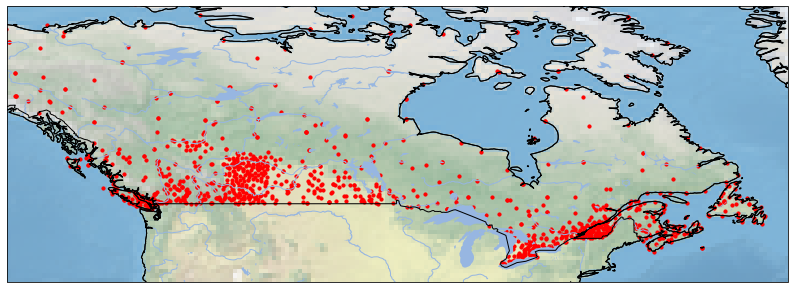

In [ ]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), color='r', s=10)
plt.show()

KMeans klasterizacija:

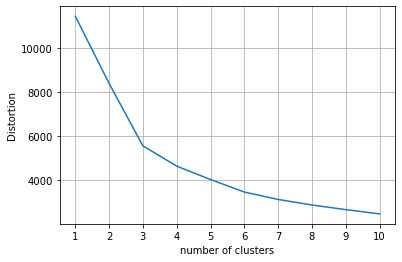

In [ ]:
max_nr_clusters = 10
cost_func = []
for nr_clusters in range(1, max_nr_clusters + 1):
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=nr_clusters, init='k-means++', n_init=20)
    kmeans.fit(scaler.fit_transform(data))
    cost_func.append(kmeans.inertia_)

plt.plot(range(1, max_nr_clusters + 1), cost_func)
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.xticks(range(1,  max_nr_clusters + 1))
plt.grid()

According to the elbow method, we might choose 3 or 6 clusters. Let's go with 3. 

In [ ]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20)
y_pred = kmeans.fit_predict(scaler.fit_transform(data))

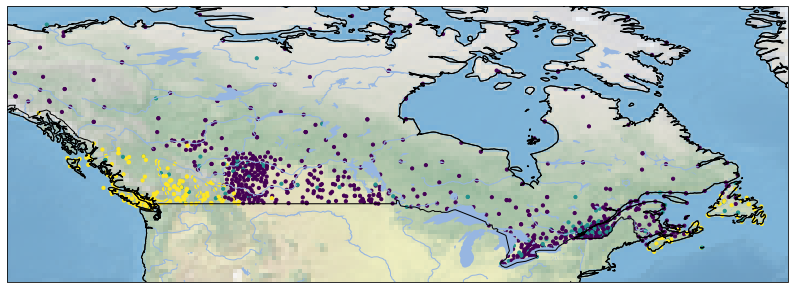

In [ ]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), c=y_pred, s=10)
plt.show()

Za 3 klastera, ako zanemarimo stanice na severu Kanade, možemo videti da klasterizacija prema karakteristikama vremena zapravo generiše klastere koji su raspoređeni prema blizini stanice okeanu.

To ima smisla, ali možda bi pokušaj klasterovanja sa pažljivo podešenim DBSCAN-om dao bolje rezultate.

Probajte i sa drugim brojem klastera.

## 9.3. Primene klasterizacije

KMeans klasterizacija se prilično lako primenjuje čak i na velike skupove podataka, pa ima mnogo primena. Uspešno je korišćen u klasterizaciji korisnika u segmentaciji tržišta, klasifikaciji astronomskih objekata i obradi slika u računarskom vidu, između mnogih drugih domena. Takođe se često koristi kao korak pripreme za druge algoritme.

Ovde ćemo demonstrirati upotrebu KMeans klasterizacije za kvantizaciju boja. Ovo je proces smanjenja palete boja slike na fiksni broj boja k. To radimo tako što svaki piksel slike uzimamo kao tačku podataka, a njegove RGB vrednosti kao osobine. Zatim razdvajamo piksele u k klastera pomoću KMeans, i svakom pikselu dodeljujemo novu boju - boju centra njegovog klastera.

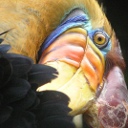

Original pixel RGB values:
 [[[219 180 103]
  [230 185 116]
  [226 186 110]
  ...
  [ 14  15  13]
  [ 13  15  12]
  [ 12  14  12]]

 [[230 193 119]
  [224 192 120]
  [226 192 124]
  ...
  [ 16  16  13]
  [ 14  15  10]
  [ 11  14   9]]

 [[228 191 123]
  [228 191 121]
  [220 185 118]
  ...
  [ 14  16  13]
  [ 13  13  11]
  [ 11  15  10]]

 ...

 [[ 15  18  16]
  [ 18  21  18]
  [ 18  19  16]
  ...
  [ 81  45  45]
  [ 70  43  35]
  [ 72  51  43]]

 [[ 16  17  17]
  [ 17  18  19]
  [ 20  19  20]
  ...
  [ 80  38  40]
  [ 68  39  40]
  [ 59  43  42]]

 [[ 15  19  19]
  [ 20  20  18]
  [ 18  19  17]
  ...
  [ 65  43  39]
  [ 58  37  38]
  [ 52  39  34]]]
Number of pixels (rows): 16384
Number of colors (columns)  3
Data:
 [[0.85882353 0.70588235 0.40392157]
 [0.90196078 0.7254902  0.45490196]
 [0.88627451 0.72941176 0.43137255]
 ...
 [0.25490196 0.16862745 0.15294118]
 [0.22745098 0.14509804 0.14901961]
 [0.20392157 0.15294118 0.13333333]]


In [ ]:
# Import libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.io import loadmat
from IPython.display import Image, display

display(Image(filename='bird_small.png')) # show picture
image_data = loadmat('bird_small.mat') # load RGB values of the pixels of the picture
A = image_data['A']
print ("Original pixel RGB values:\n",A)

A = A / 255. # normalize value ranges
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2])) # reshape the array

print ("Number of pixels (rows):",np.size(X,axis=0))
print ("Number of colors (columns) ",np.size(X,axis=1))
print ("Data:\n",X)

Sada imamo podatke u nizu X koji predstavljaju sve vrednosti piksela sa brojem između 0 i 1. Primetite da postoje 16.384 piksela (rezolucija) i svaki piksel ima 3 boje (crvenu, zelenu i plavu nijansu).

Zatim koristimo KMeans da razdvojimo piksele u klastere prema sličnosti njihovih boja. Nakon toga, boja svakog piksela se menja bojom centra njegovog klastera.

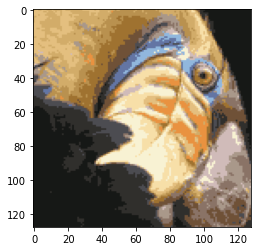

In [ ]:
n_clusters = 16 # define number of clusters

# Run the algorithm:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5) 
y_pred = kmeans.fit_predict(X)

# Recolor each pixel with its cluster centroid color and regenerate and show the new image: 
X_recovered = kmeans.cluster_centers_[y_pred] 
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered);

Slika sada ima onoliko boja koliko ima klastera. Slika je i dalje prepoznatljiva, ali sadrži znatno manje boja od originala i stoga su smanjeni njena veličina i zahtevi za memorijom.

Pokušajte ponovo da klastirate i generišete sliku sa različitim brojem klastera.

In [ ]:
import session_info
session_info.show()